<h1 style="color:black" align="center">Минимизация Coursera</h1>

**Подключение бибилиотек**

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [111]:
def minimize(function, grad, point, eta=0.1):
    for i in range(70):
        point -= eta * grad(point[0], point[1])
    print(point)

In [112]:
def fx(x, y):
    return 4*x**2 - 6*x*y - 34*x + 5*y**2 + 42*y + 7

def grad(x, y):
    f_x = 8*x - 6*y - 34
    f_y = -6*x + 10*y + 42
    return np.array([f_x, f_y])

In [113]:
minimize(fx, grad, [1, 2])

[ 2. -3.]


<h1 style="color:black" align="center">Настройки</h1>

**Генерация данных**

In [114]:
np.random.seed(1234)
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

# возьмем нулевые начальные веса
w = np.zeros(n_features)

**Визуализация данных**

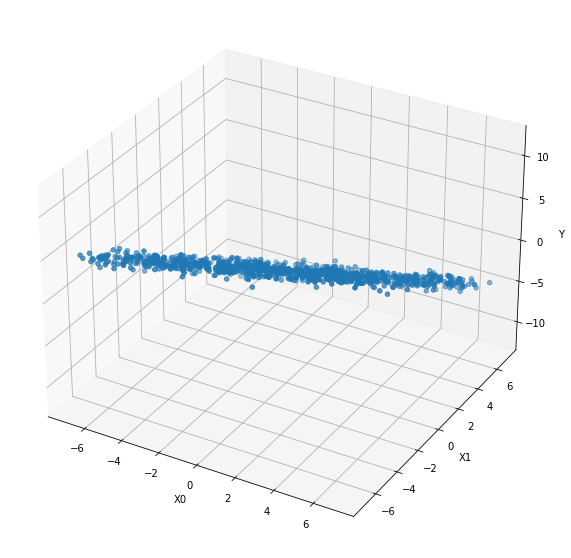

In [115]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

<h1 style="color:black" align="center">Метод наименьших квадратов</h1>

In [116]:
class Mnk:
    def mserror(self, y_pred, y):
        return np.sum((y_pred - y)**2) / y.shape[0]
        
    def fit(self, X, y):
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        self.weights = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
    
    def predict(self, X):
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        return X @ self.weights

In [117]:
model = Mnk()
model.fit(X, y)
print(f"Веса модели {model.weights}")

Веса модели [ 0.46640589 -1.18312392  0.03865496]


In [118]:
y_pred = model.predict(X)
print(f"Функционал ошибки {model.mserror(y_pred, y):.4f}")

Функционал ошибки 0.2398


<h1 style="color:black" align="center">Полный градиент</h1>

In [119]:
class LinearRegression:
    def __init__(self, eta=0.03, max_iter=1e4, min_weight_dist=1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    
    def grad(self, X, y):
        return 2 / y.shape[0] * np.dot(X.T, np.dot(X, self.w) - y)
    
    def fit(self, X, y):
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        iter_num = 0
        weight_dist = np.inf
        self.w = np.random.normal(size=X.shape[1])
        
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            new_w = self.w - self.eta * self.grad(X, y)
            weight_dist = np.linalg.norm(new_w - self.w, ord=2)
            iter_num += 1
            self.w = new_w
            
    def predict(self, X):
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        return X.dot(self.w)
    
    def mserror(self, y_pred, y):
        return np.sum((y_pred - y)**2) / y.shape[0]

In [120]:
model = LinearRegression()
model.fit(X, y)

In [121]:
model.w

array([ 0.46640589, -1.18312392,  0.0386548 ])

In [122]:
y_pred = model.predict(X)
print(f"Функционал ошибки {model.mserror(y_pred, y):.4f}")

Функционал ошибки 0.2398


**Проверка сдвига**

In [123]:
shift=100
Y_shift=y+shift
lr=LinearRegression()
lr.fit(X, Y_shift)

In [124]:
lr.w

array([  0.46640589,  -1.18312392, 100.0386548 ])

# Полиномиальная регрессия

In [125]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as sklearn_LR
%matplotlib inline

### Генерация данных

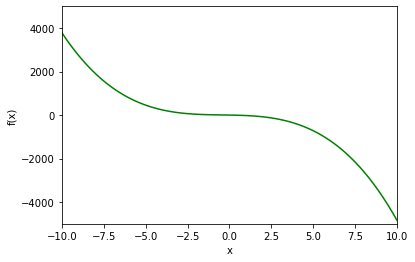

In [128]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.show()

In [129]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

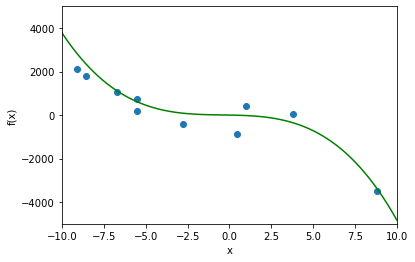

In [130]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.show()

### Написание polynomial_regression

In [250]:
from sklearn.preprocessing import PolynomialFeatures

In [251]:
class polynomial_regression(LinearRegression):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    @staticmethod
    def generate_features(x, max_power):
        x=x[:, np.newaxis]  # Меняем размерность
        return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)
#         return PolynomialFeatures(max_power, include_bias=False).fit_transform(x[:, None])  # sklearn вариант
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power))
    def test(self, x, y):
        return super().test(self.generate_features(x, self.max_power), y)
    
class polynomial_regression_sklearn(sklearn_LR):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    generate_features=staticmethod(polynomial_regression.generate_features)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power))
    def test(self, x, y):
        return np.sum((self.predict(x) - y)**2) / y.shape[0]

**Принцип создания признаков**

In [252]:
polynomial_regression.generate_features(np.array([1, 2, 3, 4]), 4)

array([[  1,   1,   1,   1],
       [  2,   4,   8,  16],
       [  3,   9,  27,  81],
       [  4,  16,  64, 256]], dtype=int32)

**Для нашего набора данных**

In [253]:
x_data

array([-5.53417842,  0.46326683,  1.01402913, -9.087961  , -2.78542329,
       -5.53838117,  3.77452324, -6.7253715 , -8.59350266,  8.8202172 ])

In [254]:
polynomial_regression.generate_features(x_data, 2)

array([[-5.53417842, 30.62713075],
       [ 0.46326683,  0.21461615],
       [ 1.01402913,  1.02825508],
       [-9.087961  , 82.59103509],
       [-2.78542329,  7.75858292],
       [-5.53838117, 30.67366594],
       [ 3.77452324, 14.24702566],
       [-6.7253715 , 45.23062181],
       [-8.59350266, 73.84828803],
       [ 8.8202172 , 77.79623154]])

**Идея перезаписи Sklearn polynomial_regression**

In [255]:
#Построение полиномиальной регресси при помощи реализации линейной регрессии из Sklearn
mod1=sklearn_LR()
mod1.fit(polynomial_regression.generate_features(x_data, 3), f_data)
mod1.predict(polynomial_regression.generate_features(x_data, 3))

array([  307.77840643,   -48.2985274 ,   -47.13060843,  2299.31085444,
         -83.91820643,   308.9693798 ,  -318.18124167,   741.44413131,
        1884.45967312, -3410.05956649])

In [256]:
#Построение полиномиальной регресси при ощи созданного нами класса
mod2=polynomial_regression_sklearn(3)
mod2.fit(x_data, f_data)
mod2.predict(x_data)

array([  307.77840643,   -48.2985274 ,   -47.13060843,  2299.31085444,
         -83.91820643,   308.9693798 ,  -318.18124167,   741.44413131,
        1884.45967312, -3410.05956649])

**Сравнение**

In [257]:
# Необходимо подбирать длину шага для нашей модели
our_mod=polynomial_regression(2, 0.0004)
our_mod.fit(x_data, f_data)
sk_mod=polynomial_regression_sklearn(2)
sk_mod.fit(x_data, f_data)
print('Коэффициенты при факторах(наша модель):', our_mod.w[:2])
print('Коэффициенты при факторах(sklearn):', sk_mod.coef_)
print('Нулевые коэффициенты(интерцепты):', our_mod.w[-1], sk_mod.intercept_)

Коэффициенты при факторах(наша модель): [-245.90524526   -5.95609023]
Коэффициенты при факторах(sklearn): [-245.99569456   -5.82400107]
Нулевые коэффициенты(интерцепты): -211.19775709120452 -219.69194405215626


In [258]:
our_mod.predict(x_data)

array([  967.2677895 ,  -326.39577323,  -466.67721944,  1531.65986344,
         427.54162097,   968.02409978, -1224.22938966,  1173.20870625,
        1462.14255603, -2843.49680689])

In [148]:
sk_mod.predict(x_data)

array([  963.31967725,  -334.90351389,  -475.12730327,  1534.8970571 ,
         420.32419835,   964.08251447, -1231.1831019 ,  1171.29729954,
        1464.18020411, -2842.51273709])

Можем сделать вывод о том, что наша реализация практически идентичная. Только стоит правильно подобрать шаг обучения и отличия практически не будет.

### До степени 2

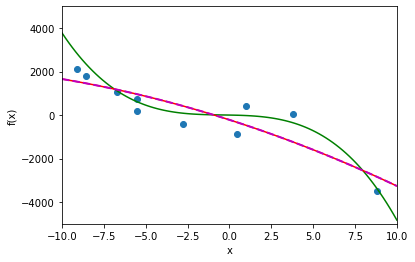

In [249]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(2)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

#Sklearn
model2 = polynomial_regression_sklearn(2)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), 'm--', linewidth=2)
plt.show()

Дальше будет сложно модели обучиться, так как у нас не адаптивный шаг. Если унаследоваться от класса Mnk для polynomial_regression, тогда мы сможем обучиться до больших степеней, так как у нас нет трбования к подбору шага.

**Если вернусь к этому файлу необходимо сделать следующее:**
* Написать динамический шаг и сравнить с моделью Арсения, так как там используется динамический шаг. Динамический шаг можно взять из реализации ВШЭ.
* Настроить нормально размерности получаемых X и y, в случае отличия должно выполняться преобразование к одному np.ndim(X).

<h1 style="color:black" align="center">Полный градиент Версия 2 (DELL)</h1> 

### Генерация данных

In [157]:
np.random.seed(1234)
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, 1))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects, 1))

# возьмем нулевые начальные веса
w = np.zeros((n_features, 1))

In [158]:
display(w, w_true, X, Y[:5])

array([[0.],
       [0.]])

array([[ 0.47143516],
       [-1.19097569]])

array([[-0.87181165,  3.99502017],
       [ 3.91966131, -3.18370353],
       [-3.12950043,  4.22621049],
       ...,
       [ 3.51597757,  5.11940305],
       [ 6.35903104,  5.31390661],
       [ 5.12347492,  2.96879971]])

array([[-5.71937308],
       [ 6.42200487],
       [-6.22754907],
       [-3.61309248],
       [-1.24952278]])

In [159]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_real):
    y = X.dot(w)
    return np.sum((y - y_real)**2) / y_real.shape[0]

In [160]:
def mserror_grad(X, w, y_real):
    return 2 * X.T.dot(X.dot(w)-y_real) / y_real.shape[0]

In [161]:
mserror(X, w_true, Y), mserror(X, w, Y)

(0.24274458418002065, 26.37079744484684)

In [162]:
class linear_regression:
    def __init__(self, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(self.w0 + X.dot(w) - y_real)
        return 2*X.T.dot(delta)/y_real.shape[0], 2*np.sum(delta)/y_real.shape[0]
    def _optimize(self, X, Y):
        #оптимизация коэффициентов
        iter_num = 0
        weight_dist = np.inf
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_w0=self._mserror_grad(X, Y)
            if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
                eta=self.eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
            new_w = self.w - eta * gr_w
            new_w0= self.w0 - eta * gr_w0
            weight_dist = np.sqrt(np.linalg.norm(new_w - self.w)**2+(new_w0 - self.w0)**2)
            iter_num += 1
            self.w = new_w
            self.w0 = new_w0
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
        return self
    def predict(self, X):
        return (X.dot(self.w)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)
    

In [163]:
Y_shift=Y
lr=linear_regression(0.5)
lr.fit(X, Y_shift)
lr.test(X, Y_shift)

914131196.7206535

In [164]:
 def mserror_grad(X, w, w0, y_real):
    delta=(w0 + X.dot(w) - y_real)
    return 2 * X.T.dot(delta)/y_real.shape[0], 2 * np.sum(delta)/y_real.shape[0]

In [165]:
 def mserror_grad2(X, w, w0, y_real):
    delta=(w0 + X.dot(w) - y_real)
    return 2 * X.T.dot(delta)/y_real.shape[0], 2 * np.sum(delta)/y_real.shape[0]

In [166]:
mserror_grad(X, w, w0, Y)

NameError: name 'w0' is not defined

In [167]:
w02 = np.random.normal(size=(1000, 1))
w02[:, 0] = 11

In [168]:
mserror_grad2(X, w, w02, Y)

(array([[-15.32075833],
        [ 38.20974168]]),
 21.931172850857873)